In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from camera_calibration import CameraCalibration
from stereogram_generator import StereogramGenerator
from stereo_calibration import stereo_calibrate

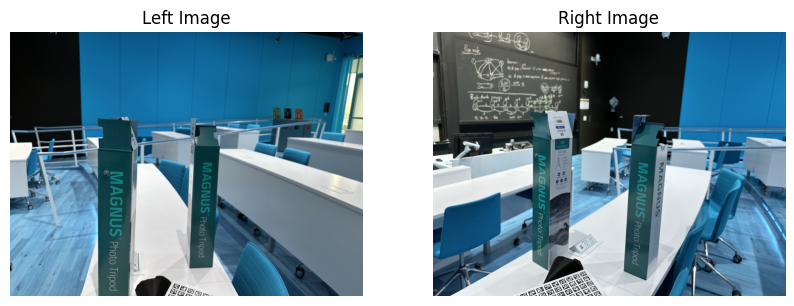

In [10]:
imgL = cv2.imread('camera_left/IMG_4014.jpeg')
imgR = cv2.imread('camera_right/IMG_7002.jpeg')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # figsize can be adjusted depending on your display size or preference

ax[0].imshow(imgL)
ax[0].set_title('Left Image')
ax[0].axis('off')  # Turn off axis numbers and ticks

# Display right image on the second subplot
ax[1].imshow(imgR)
ax[1].set_title('Right Image')
ax[1].axis('off')  # Turn off axis numbers and ticks

# Display the figure
plt.show()

Camera Calibration

17 images:
RMSE of reprojected points: 0.6194835538236152
Distortion coefficients: [[ 0.19612 -0.68969 -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.21  0.97 -0.09  3.34]
 [ 0.98  0.22  0.04 -8.4 ]
 [ 0.06 -0.08 -1.   19.67]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[ 0.08  0.99 -0.09  0.16]
 [ 0.78 -0.    0.63 -4.96]
 [ 0.62 -0.12 -0.77 17.21]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.03  0.98 -0.21  0.65]
 [ 0.79  0.11  0.6  -5.04]
 [ 0.61 -0.19 -0.77 16.47]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

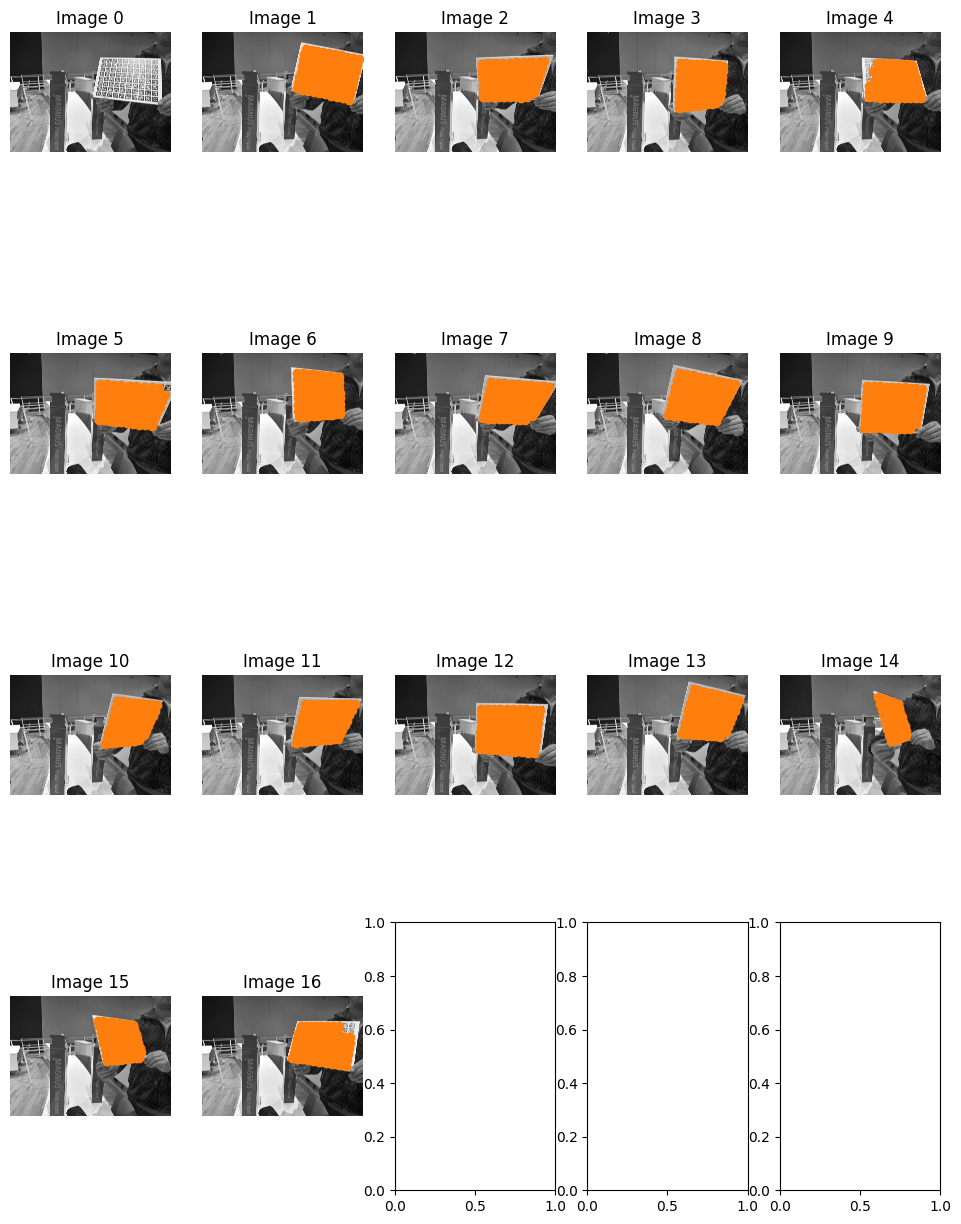

In [11]:
calib_left_camera_filepath = 'camera_left/calibration/IMG_*.jpeg'

left_cc = CameraCalibration()
reprojerr_L, calMatrix_L, distCoeffs_L, calRotations_L, calTranslations_L, extrinsic_matrices_L, calObjPoints_L, calImgPoints_L = left_cc.calibrate_camera(calib_left_camera_filepath, True)

17 images:
RMSE of reprojected points: 0.6194835538236152
Distortion coefficients: [[ 0.19612 -0.68969 -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.21  0.97 -0.09  3.34]
 [ 0.98  0.22  0.04 -8.4 ]
 [ 0.06 -0.08 -1.   19.67]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[ 0.08  0.99 -0.09  0.16]
 [ 0.78 -0.    0.63 -4.96]
 [ 0.62 -0.12 -0.77 17.21]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.03  0.98 -0.21  0.65]
 [ 0.79  0.11  0.6  -5.04]
 [ 0.61 -0.19 -0.77 16.47]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

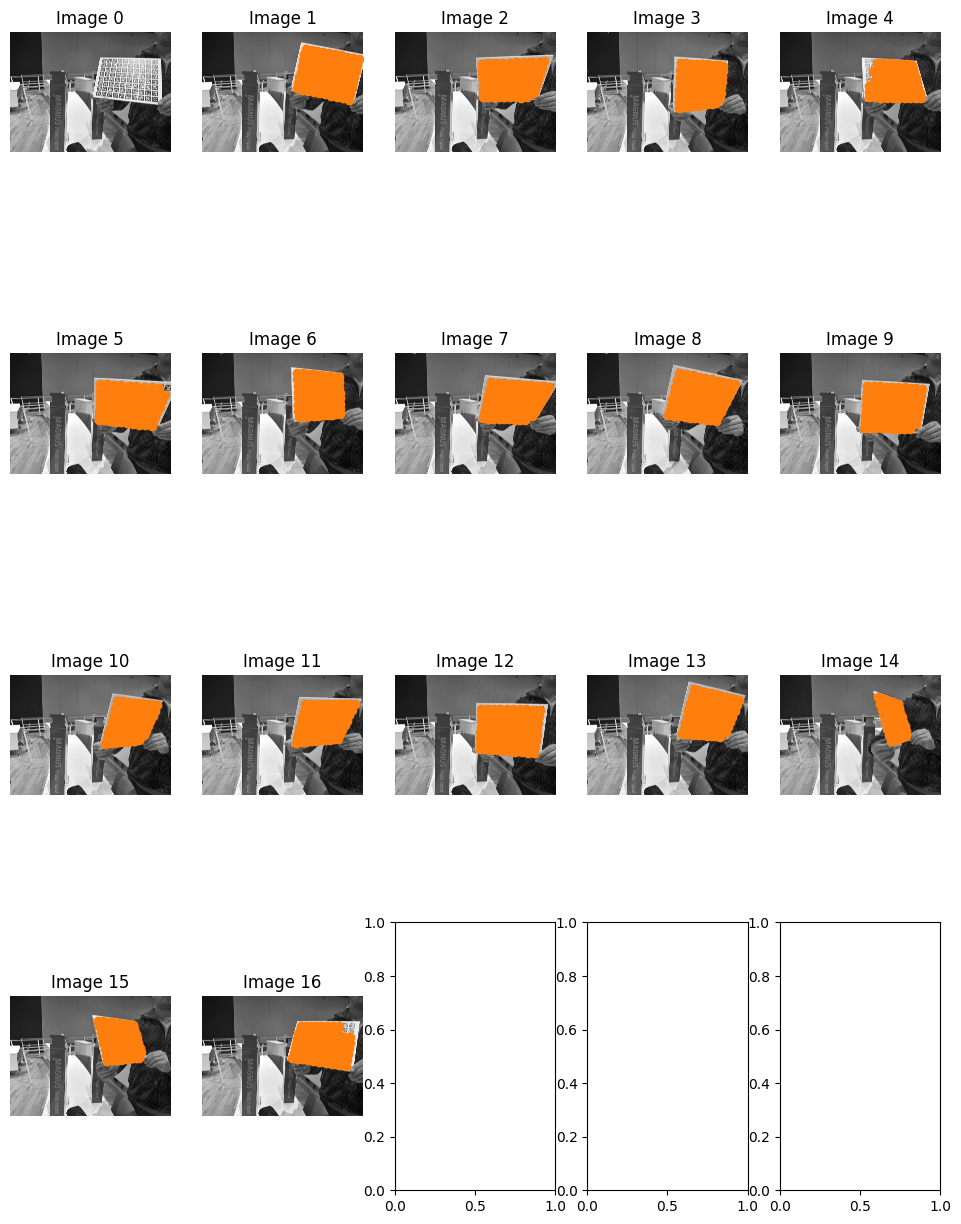

In [4]:
calib_right_camera_filepath = 'camera_right/calibration/IMG_*.jpeg'

right_cc = CameraCalibration()
reprojerr_R, calMatrix_R, distCoeffs_R, calRotations_R, calTranslations_R, extrinsic_matrices_R, calObjPoints_R, calImgPoints_R = right_cc.calibrate_camera(calib_left_camera_filepath, True)

In [5]:
img_shape = (imgR.shape[0], imgR.shape[1])
R, T, E, F = stereo_calibrate(calObjPoints_L, calImgPoints_L, calImgPoints_R, calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, img_shape)

Rotation Matrix (R):
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
Translation Vector (T):
 [[ 0.]
 [-0.]
 [-0.]]
Essential Matrix (E):
 [[-0.  0. -0.]
 [-0.  0. -0.]
 [ 0.  0. -0.]]
Fundamental Matrix (F):
 [[ 2.09e-08 -3.47e+04  1.11e+08]
 [ 3.47e+04 -8.40e-08 -2.74e+06]
 [-1.11e+08  2.74e+06  1.00e+00]]


In [8]:


R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, imgL.shape[:2], R, T)

map1x, map1y = cv2.initUndistortRectifyMap(calMatrix_L, distCoeffs_L, R1, P1, imgL.shape[:2], cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(calMatrix_R, distCoeffs_R, R2, P2, imgR.shape[:2], cv2.CV_32FC1)

rectified_imgL = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR)
rectified_imgR = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR)


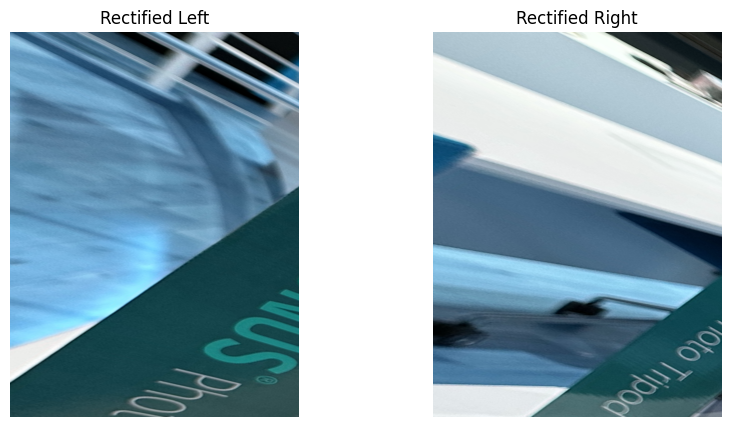

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # figsize can be adjusted depending on your display size or preference

ax[0].imshow(rectified_imgL)
ax[0].set_title('Rectified Left')
ax[0].axis('off')  # Turn off axis numbers and ticks

# Display right image on the second subplot
ax[1].imshow(rectified_imgR)
ax[1].set_title('Rectified Right')
ax[1].axis('off')  # Turn off axis numbers and ticks

# Display the figure
plt.show()